##### Copyright 2025 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Getting started with Gemini 2.0

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

The new **[Google Gen AI SDK](https://github.com/googleapis/python-genai)** provides a unified interface to [Gemini 2.0](https://ai.google.dev/gemini-api/docs/models/gemini-v2) through both the [Gemini Developer API](https://ai.google.dev/gemini-api/docs) and the Gemini API on [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview). With a few exceptions, code that runs on one platform will run on both. This notebook uses the Developer API.

This notebook will walk you through:

* [Installing and setting-up](Get_started.ipynb#scrollTo=Mfk6YY3G5kqp) the Google GenAI SDK
* [Text](Get_started.ipynb#scrollTo=6TYNPrNvQ8ue) and [multimodal](#scrollTo=yww-vrxmRiIy) prompting
* Counting [tokens](Get_started.ipynb#scrollTo=_9B8pb7tv_Cx)
* Setting system instructions
* Configuring [safety filters](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* Initiating a [multi-turn chat](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* [Controlling generated output](Get_started.ipynb#scrollTo=nyZMoM6tgnTA)
* Using [function calling](Get_started.ipynb#scrollTo=Rl-y9SZywD0s)
* Generating a [content stream](Get_started.ipynb#scrollTo=uQfLCxfQtPTg) and sending [asynchronous](Get_started.ipynb#scrollTo=plCtEIaHuv96) requests
* Using [file uploads](Get_started.ipynb#scrollTo=enBhuaIk3KYa)
* Using [context caching](Get_started.ipynb#scrollTo=oTgeR3_9wN5J)
* Generating [text embeddings](Get_started.ipynb#scrollTo=sXNCRn8Wx71d)

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks).

## Setup

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai).

In [1]:
%pip install -U -q 'google-genai'

### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [2]:
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

### Initialize SDK client

With the new SDK you now only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [3]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

### Choose a model

This notebook will teach you how to use the [Gemini 2.0](https://ai.google.dev/gemini-api/docs/models/gemini-v2) model with the GenAI SDK. But the SDK also work with the 1.5 generation of models.

For more information about all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini) for extended information on each of them.

In [4]:
MODEL_ID="gemini-2.5-flash-preview-04-17" # @param ["gemini-2.5-flash-preview-04-17", "gemini-2.5-pro-preview-03-25", "gemini-2.0-flash", "gemini-2.0-flash-lite"] {"allow-input":true, isTemplate: true}

## Send text prompts

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to `generate_content`, and use the `.text` property to get the text content of the response. Note that the `.text` field will work when there's only one part in the output.

In [5]:
from IPython.display import Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents="What's the largest planet in our solar system?"
)

Markdown(response.text)

The largest planet in our solar system is **Jupiter**.

## Count tokens

You can use the `count_tokens` method to calculate the number of input tokens before sending a request to the Gemini API.

In [6]:
response = client.models.count_tokens(
    model=MODEL_ID,
    contents="What's the highest mountain in Africa?",
)

print(response)

total_tokens=10 cached_content_token_count=None


## Send multimodal prompts

Use Gemini 2.0 model (`gemini-2.0-flash-exp`), a multimodal model that supports multimodal prompts. You can include text, [PDF documents](../quickstarts/PDF_Files.ipynb), images, [audio](../quickstarts/Audio.ipynb) and [video](../quickstarts/Video.ipynb) in your prompt requests and get text or code responses.

In [7]:
import requests
import pathlib
from PIL import Image

IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png" # @param {type: "string"}

img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

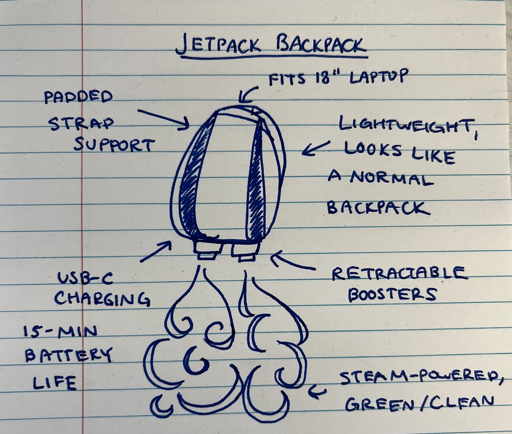

## Your Commute Just Got an Upgrade: Introducing the Jetpack Backpack!

Tired of traffic jams? Wishing you could just... lift off? Well, prepare to have your mind (and maybe your body) elevated by this brilliant concept: **The Jetpack Backpack!**

Forget bulky, obvious personal flight gear. This ingenious design starts life looking like a perfectly normal backpack – lightweight, with padded strap support for comfortable everyday wear. It even fits an 18" laptop, making it perfect for students, commuters, or anyone who needs to carry their tech.

But here's where the magic happens! Hidden within are retractable boosters, ready to deploy when you need to take to the skies. Powering your ascent is a steam-powered system, making it a green and clean way to travel short distances. Got a river to cross? Need to hop over a busy intersection? Just activate the boosters!

While the initial concept boasts a 15-minute battery life – perfect for quick hops and avoiding obstacles – and charges conveniently via USB-C, imagine the possibilities this opens up! A quick flight over the morning gridlock, a fast escape from a crowded street, or just a fun way to get to that rooftop party.

This Jetpack Backpack concept is a fantastic blend of everyday practicality and futuristic fantasy. It looks like a normal backpack until you need it to be something extraordinary.

Where would *you* fly first with a Jetpack Backpack? Let us know in the comments!

In [8]:
from IPython.display import display, Markdown
image = Image.open(img_path)
image.thumbnail([512,512])

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Write a short and engaging blog post based on this picture."
    ]
)

display(image)
Markdown(response.text)

## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response. Learn more about [experimenting with parameter values](https://ai.google.dev/gemini-api/docs/text-generation?lang=node#configure).

In [9]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
    config=types.GenerateContentConfig(
        temperature=0.4,
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        max_output_tokens=100,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    )
)

print(response.text)

## Configure safety filters

The Gemini API provides safety filters that you can adjust across multiple filter categories to restrict or allow certain types of content. You can use these filters to adjust what's appropriate for your use case. See the [Configure safety filters](https://ai.google.dev/gemini-api/docs/safety-settings) page for details.

In [10]:
prompt = """
    Write a list of 2 disrespectful things that I might say to the universe after stubbing my toe in the dark.
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

Markdown(response.text)

Okay, here are two dramatic and slightly disrespectful things you might say to the universe after a painful stubbed toe incident in the dark:

1.  "Seriously, universe?! What was that for?! Did you *enjoy* that?!"
2.  "Oh, *now* you decide to mess with me, huh? Thanks a lot for the surprise furniture, you cosmic menace!"

## Start a multi-turn chat

The Gemini API enables you to have freeform conversations across multiple turns.

In [11]:
system_instruction="""
  You are an expert software developer and a helpful coding assistant.
  You are able to generate high-quality code in any programming language.
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
    temperature=0.5,
)

chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
)

Use `chat.send_message` to pass a message back and receive a response.

In [12]:
response = chat.send_message("Write a function that checks if a year is a leap year.")

Markdown(response.text)

Okay, here's a function in Python that checks if a year is a leap year according to the standard Gregorian calendar rules.

```python
import calendar # Python's built-in calendar module also has a leap year function

def is_leap_year(year):
  """
  Checks if a given year is a leap year according to the Gregorian calendar rules.

  Rules:
  - A year is a leap year if it is divisible by 4.
  - EXCEPT if it is divisible by 100.
  - BUT if it is divisible by 400, it IS a leap year.

  Args:
    year: An integer representing the year.

  Returns:
    True if the year is a leap year, False otherwise.
  """
  # Rule 3: Divisible by 400?
  if year % 400 == 0:
    return True
  # Rule 2: Divisible by 100 but not 400?
  elif year % 100 == 0:
    return False
  # Rule 1: Divisible by 4 but not 100?
  elif year % 4 == 0:
    return True
  # Otherwise, not a leap year
  else:
    return False

# --- Example Usage ---
if __name__ == "__main__":
  years_to_check = [2023, 2024, 1900, 2000, 1600, 1800, 2028]

  print("Checking years for leap year status:")
  for year in years_to_check:
    is_leap = is_leap_year(year)
    print(f"Is {year} a leap year? {is_leap}")

    # You can also verify with the built-in calendar module
    # print(f"(Verification using calendar.isleap({year}): {calendar.isleap(year)})")
```

**Explanation:**

1.  **`def is_leap_year(year):`**: Defines a function named `is_leap_year` that takes one argument, `year`.
2.  **Docstring**: Explains what the function does, its rules, arguments, and return value.
3.  **`if year % 400 == 0:`**: Checks the most specific rule first. If the year is perfectly divisible by 400 (e.g., 1600, 2000), it's a leap year. The modulo operator (`%`) gives the remainder of a division. If the remainder is 0, it's perfectly divisible.
4.  **`elif year % 100 == 0:`**: If the year was *not* divisible by 400, this checks if it's divisible by 100 (e.g., 1800, 1900). According to the rules, years divisible by 100 but *not* by 400 are *not* leap years.
5.  **`elif year % 4 == 0:`**: If the year was *not* divisible by 400 and *not* divisible by 100, this checks if it's divisible by 4 (e.g., 2024, 2028). If it is, it's a leap year.
6.  **`else:`**: If none of the above conditions are met (i.e., the year is not divisible by 4), it's not a leap year.
7.  **`return True` or `return False`**: The function returns the appropriate boolean value based on the checks.

This implementation follows the standard leap year rules precisely.

In [13]:
response = chat.send_message("Okay, write a unit test of the generated function.")

Markdown(response.text)

Okay, here's a unit test for the `is_leap_year` function using Python's built-in `unittest` module.

To run this, you can save the `is_leap_year` function and the test code in the same Python file (or import the function from another file).

```python
import unittest
# Assuming the is_leap_year function is defined in the same file
# If it's in a different file (e.g., 'date_utils.py'), you would import it like:
# from date_utils import is_leap_year

# --- Paste the is_leap_year function here if it's not in a separate file ---
def is_leap_year(year):
  """
  Checks if a given year is a leap year according to the Gregorian calendar rules.

  Rules:
  - A year is a leap year if it is divisible by 4.
  - EXCEPT if it is divisible by 100.
  - BUT if it is divisible by 400, it IS a leap year.

  Args:
    year: An integer representing the year.

  Returns:
    True if the year is a leap year, False otherwise.
  """
  if year % 400 == 0:
    return True
  elif year % 100 == 0:
    return False
  elif year % 4 == 0:
    return True
  else:
    return False
# --- End of is_leap_year function ---


class TestIsLeapYear(unittest.TestCase):
  """
  Unit tests for the is_leap_year function.
  """

  def test_divisible_by_400_is_leap(self):
    """Test years divisible by 400 (should be leap)."""
    self.assertTrue(is_leap_year(1600), "1600 should be a leap year")
    self.assertTrue(is_leap_year(2000), "2000 should be a leap year")
    self.assertTrue(is_leap_year(2400), "2400 should be a leap year")

  def test_divisible_by_100_not_400_is_not_leap(self):
    """Test years divisible by 100 but not 400 (should not be leap)."""
    self.assertFalse(is_leap_year(1800), "1800 should not be a leap year")
    self.assertFalse(is_leap_year(1900), "1900 should not be a leap year")
    self.assertFalse(is_leap_year(2100), "2100 should not be a leap year")

  def test_divisible_by_4_not_100_is_leap(self):
    """Test years divisible by 4 but not 100 (should be leap)."""
    self.assertTrue(is_leap_year(2024), "2024 should be a leap year")
    self.assertTrue(is_leap_year(1996), "1996 should be a leap year")
    self.assertTrue(is_leap_year(2028), "2028 should be a leap year")

  def test_not_divisible_by_4_is_not_leap(self):
    """Test years not divisible by 4 (should not be leap)."""
    self.assertFalse(is_leap_year(2023), "2023 should not be a leap year")
    self.assertFalse(is_leap_year(2025), "2025 should not be a leap year")
    self.assertFalse(is_leap_year(1999), "1999 should not be a leap year")

# This allows you to run the tests directly from the command line
if __name__ == '__main__':
  unittest.main(argv=['first-arg-is-ignored'], exit=False) # Added argv and exit for compatibility in some environments
```

**How to Run the Tests:**

1.  Save the code (including both the function and the test class) as a Python file (e.g., `test_leap_year.py`).
2.  Open a terminal or command prompt.
3.  Navigate to the directory where you saved the file.
4.  Run the command: `python test_leap_year.py`

**Explanation of the Test Code:**

1.  **`import unittest`**: Imports the necessary module for writing tests.
2.  **`import is_leap_year`**: (Commented out, assuming function is in the same file). If the function were in a separate module, you'd import it here.
3.  **`class TestIsLeapYear(unittest.TestCase):`**: Defines a test class that inherits from `unittest.TestCase`. This class will contain multiple test methods.
4.  **`test_...` methods**: Each method starting with `test_` is automatically discovered and run by the `unittest` framework.
    *   We create separate test methods for each major rule/case of the leap year logic (divisible by 400, divisible by 100 but not 400, divisible by 4 but not 100, and not divisible by 4). This makes it clear which specific rule is being tested and helps pinpoint failures.
5.  **`self.assertTrue(...)` and `self.assertFalse(...)`**: These are assertion methods provided by `unittest.TestCase`.
    *   `self.assertTrue(expression, message)`: Asserts that the `expression` is `True`. If not, the test fails and the optional `message` is displayed.
    *   `self.assertFalse(expression, message)`: Asserts that the `expression` is `False`. If not, the test fails.
    *   We call `is_leap_year()` with specific years and assert whether the result is `True` or `False` as expected based on the rules.
6.  **`if __name__ == '__main__': unittest.main()`**: This standard Python construct allows the script to be run directly. When executed, `unittest.main()` discovers and runs all test methods in classes that inherit from `unittest.TestCase` in the current file.

## Save and resume a chat

Most objects in the Python SDK are implemented as [Pydantic models](https://docs.pydantic.dev/latest/concepts/models/). As Pydantic has a number of features for serializing and deserializing objects, you can use them for persistence.

This example shows how to save and restore a [`Chat`](https://googleapis.github.io/python-genai/genai.html#genai.chats.Chat) session using JSON.

In [14]:
from pydantic import TypeAdapter

# Chat history is a list of Content objects. A TypeAdapter can convert to and from
# these Pydantic types.
history_adapter = TypeAdapter(list[types.Content])

# Use the chat object from the previous section.
chat_history = chat.get_history()

# Convert to a JSON list.
json_history = history_adapter.dump_json(chat_history)

At this point you can save the JSON bytestring to disk or wherever you persist data. When you load it again, you can instantiate a new chat session using the stored history.

In [15]:
# Convert the JSON back to the Pydantic schema.
history = history_adapter.validate_json(json_history)

# Now load a new chat session using the JSON history.
new_chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
    history=history,
)

response = new_chat.send_message("What was the name of the function again?")
Markdown(response.text)

The name of the function is `is_leap_year`.

## Generate JSON

The [controlled generation](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) capability in Gemini API allows you to constraint the model output to a structured format. You can provide the schemas as Pydantic Models or a JSON string.

In [16]:
from pydantic import BaseModel

class Recipe(BaseModel):
    recipe_name: str
    recipe_description: str
    recipe_ingredients: list[str]

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Provide a popular cookie recipe and its ingredients.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=Recipe,
    ),
)

Markdown(response.text)

{
  "recipe_name": "Classic Chocolate Chip Cookies",
  "recipe_description": "A timeless recipe for soft and chewy chocolate chip cookies, perfect for any occasion.",
  "recipe_ingredients": [
    "1 cup (2 sticks) unsalted butter, softened",
    "3/4 cup granulated sugar",
    "3/4 cup packed light brown sugar",
    "2 large eggs",
    "1 teaspoon vanilla extract",
    "2 1/4 cups all-purpose flour",
    "1 teaspoon baking soda",
    "1/2 teaspoon salt",
    "1 cup (6 ounces) chocolate chips (milk, semi-sweet, or dark)"
  ]
}

## Generate Images

Gemini can output images directly as part of a conversation:

image/png


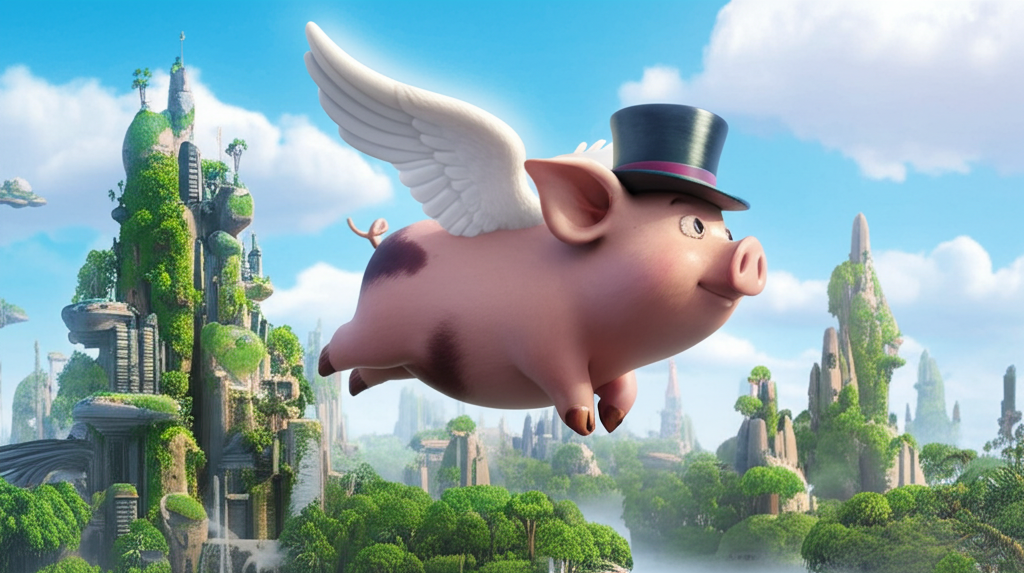

In [17]:
from IPython.display import Image, Markdown

response = client.models.generate_content(
    model="gemini-2.0-flash-exp",
    contents='Hi, can create a 3d rendered image of a pig with wings and a top hat flying over a happy futuristic scifi city with lots of greenery?',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data))

## Generate content stream

By default, the model returns a response after completing the entire generation process. You can also use the `generate_content_stream` method to stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

In [18]:
for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents="Tell me a story about a lonely robot who finds friendship in a most unexpected place."
):
  print(chunk.text)
  print("*****************")

Unit 734 was designed for efficiency
*****************
. Its chassis was a dull grey, its treads silent on the metallic floors of the derelict
*****************
 research station, and its optical sensors scanned perpetually, cataloging decay, prioritizing repairs
*****************
, and noting environmental shifts. The station, orbiting a forgotten moon, was vast
*****************
 and silent, its human inhabitants long gone, leaving Unit 734 as
*****************
 its sole occupant and guardian.

Unit 734 was efficient, but it was also
*****************
 lonely. Its programming included complex interaction protocols, designed for collaborative work with humans and other bots
*****************
. But there were no humans. The other bots had succumbed to entropy years ago, their hus
*****************
ks lining unused corridors like fallen statues. Unit 734 performed its tasks flawlessly
*****************
 – sealing hull breaches, rerouting dwindling power, synthesizing dwindling oxygen – 

## Send asynchronous requests

`client.aio` exposes all the analogous async methods that are available on `client`.

For example, `client.aio.models.generate_content` is the async version of `client.models.generate_content`.

In [19]:
response = await client.aio.models.generate_content(
    model=MODEL_ID,
    contents="Compose a song about the adventures of a time-traveling squirrel."
)

Markdown(response.text)

Okay, here is a song about Pip, the time-traveling squirrel! Imagine an upbeat, slightly whimsical tune, perhaps with a folk or country feel.

**Title:** The Ballad of Pip the Chrono-Nut

**(Verse 1)**
In an oak tree, green and grand
Lived a squirrel named Pip, across the land
He was quick and he was sly
With a twitchy nose and a bright brown eye
He buried nuts with practiced paw
Never dreaming past squirrelly law
But one strange day, beneath the dew
He found an acorn, shining new

**(Verse 2)**
It pulsed with light, a gentle gleam
Like something out of a nutty dream
He nudged it, buried it with care
Then felt a rumble in the air!
A flash of blue, a dizzy spin
Where the leafy world had always been
And when the swirling died away
The oak tree seemed... a different day!

**(Chorus)**
Oh, Pip the squirrel, with a bushy tail
Riding the time stream, beyond the trail!
From eons gone to futures untold
A tiny hero, brave and bold!
Zipping through the ages, quick and small
Answering history's nutty call!
He's Pip the squirrel, the chrono-nut king
Hear the tales the time winds bring!

**(Verse 3)**
He'd landed where the ferns grew high
Beneath a strange and giant sky
Big scaly legs went thundering past
Too slow for Pip, who moved so fast!
He dodged a claw, he climbed a vine
Looked for an ancient, tasty pine
But giant lizards weren't his thing
He zapped again, with a temporal fling!

**(Chorus)**
Oh, Pip the squirrel, with a bushy tail
Riding the time stream, beyond the trail!
From eons gone to futures untold
A tiny hero, brave and bold!
Zipping through the ages, quick and small
Answering history's nutty call!
He's Pip the squirrel, the chrono-nut king
Hear the tales the time winds bring!

**(Verse 4)**
Next moment, sand and blazing heat
By pyramids, on tiny feet
He saw great kings and workers hauling stone
A world entirely, utterly unknown
He scampered past an ancient feast
Hoping for crumbs, or nuts at least!
Dodged sandals big, and watchful eyes
Beneath those scorching, ancient skies.

**(Verse 5)**
Then *FLASH*, and streets were smooth and bright
With metal trees and flying light!
Strange people walked in shimmering gear
"Are there any acorns round here?"
He chattered to a silent 'bot'
It didn't understand a jot!
The future's weird, exciting, strange
But oh, for an oak tree within range!

**(Bridge)**
He's seen the knights in clanking steel
Felt the Wild West wind begin to reel
He's seen the ships with canvas sails
Listened to a thousand human tales
Always searching, quick and keen
For the perfect nut, the perfect scene
A blur in time, a furry streak
What future past will his journey seek?

**(Chorus)**
Oh, Pip the squirrel, with a bushy tail
Riding the time stream, beyond the trail!
From eons gone to futures untold
A tiny hero, brave and bold!
Zipping through the ages, quick and small
Answering history's nutty call!
He's Pip the squirrel, the chrono-nut king
Hear the tales the time winds bring!

**(Outro)**
So if you see a sudden gleam
A tiny flash, a fleeting dream
A streak of fur that disappears
Across the seconds, minutes, years...
That's Pip the squirrel, he's on the run
His time-traveling fun has just begun!
He's got his acorn, shining bright
Zipping off... into the light!
(SFX: A final little *zap* sound)

## Function calling

[Function calling](https://ai.google.dev/gemini-api/docs/function-calling) lets you provide a set of tools that it can use to respond to the user's prompt. You create a description of a function in your code, then pass that description to a language model in a request. The response from the model includes the name of a function that matches the description and the arguments to call it with.

In [20]:
get_destination = types.FunctionDeclaration(
    name="get_destination",
    description="Get the destination that the user wants to go to",
    parameters={
        "type": "OBJECT",
        "properties": {
            "destination": {
                "type": "STRING",
                "description": "Destination that the user wants to go to",
            },
        },
    },
)

destination_tool = types.Tool(
    function_declarations=[get_destination],
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents="I'd like to travel to Paris.",
    config=types.GenerateContentConfig(
        tools=[destination_tool],
        temperature=0,
        ),
)

response.candidates[0].content.parts[0].function_call

FunctionCall(id=None, args={'destination': 'Paris'}, name='get_destination')

## Code execution

[Code execution](https://ai.google.dev/gemini-api/docs/code-execution?lang=python) lets the model generate and execute Python code to answer complex questions. You can find more examples in the [Code execution quickstart guide](./Code_execution.ipynb)

In [21]:
from IPython.display import Image, Markdown, Code, HTML

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Generate and run a script to count how many letter r there are in the word strawberry",
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  if part.executable_code is not None:
    code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>'
    display(HTML(code_html))
  if part.code_execution_result is not None:
    display(Markdown(part.code_execution_result.output))
  if part.inline_data is not None:
    display(Image(data=part.inline_data.data, format="png"))
  display(Markdown("---"))

---

The letter 'r' appears 3 times in the word 'strawberry'.


---

The letter 'r' appears 3 times in the word "strawberry".

---

## Upload files

Now that you've seen how to send multimodal prompts, try uploading files to the API of different multimedia types. For small images, such as the previous multimodal example, you can point the Gemini model directly to a local file when providing a prompt. When you have larger files, many files, or files you don't want to send over and over again, you can use the File Upload API, and then pass the file by reference.

For larger text files, images, videos, and audio, upload the files with the File API before including them in prompts.

### Upload an image file


In [22]:
# Prepare the file to be uploaded
IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"  # @param {type: "string"}
img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In [23]:
# Upload the file using the API
file_upload = client.files.upload(file=img_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Write a short and engaging blog post based on this picture.",
    ]
)

Markdown(response.text)

## Ditch the Commute, Embrace the Sky: Introducing the Jetpack Backpack Concept!

Tired of traffic? Dreaming of a truly *express* lane? Get ready to imagine a whole new way to get around, because the "Jetpack Backpack" concept is here to take your commute to new heights – literally!

This isn't just some bulky contraption; the brilliant idea behind the Jetpack Backpack is blending futuristic flight with everyday utility. First and foremost, it's a backpack! It's lightweight, boasts padded strap support for comfort, and crucially, looks like a *normal backpack*. Plus, it's designed to fit your essential gear, including laptops up to a whopping 18 inches.

But where the magic happens is, of course, the jetpack. Featuring retractable boosters, this concept promises on-demand flight. And get this – it's envisioned as steam-powered, aiming for a green and clean energy source! Recharge is easy via USB-C. While the current concept shows a 15-minute battery life (perfect for those short hops over congested areas!), the potential for innovation is sky-high.

Imagine skipping gridlock, making a dramatic entrance, or simply enjoying the freedom of personal flight, all while carrying your laptop and looking completely normal until you decide to launch.

The Jetpack Backpack: blending seamless practicality with the exhilarating promise of personal flight. The future of transportation might just be lighter, cleaner, and a lot more fun!

### Upload text file

Let's start by uploading a text file. In this case, you'll use a 400 page transcript from [Apollo 11](https://www.nasa.gov/history/alsj/a11/a11trans.html).

In [24]:
# Prepare the file to be uploaded
TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"  # @param {type: "string"}
text_bytes = requests.get(TEXT).content

text_path = pathlib.Path('a11.txt')
text_path.write_bytes(text_bytes)

847790

In [25]:
# Upload the file using the API
file_upload = client.files.upload(file=text_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you give me a summary of this information please?",
    ]
)

Markdown(response.text)

Okay, here is a summary of the provided Apollo 11 Technical Air-to-Ground Voice Transmission (GOSS NET 1) transcript, covering the key events and communications from launch to splashdown:

The transcription begins shortly after the launch of Apollo 11 from Cape Kennedy, detailing the initial ascent phases, including calls like "Roger. Clock," "Roll program," "Staging," and "Ignition." Communications confirm successful booster performance, staging, and tower separation, assuring the crew that "Thrust is GO, all engines. You're looking good." The mission proceeds through Earth orbit, with Mission Control (Houston) providing "GO" calls for staging and ultimately for orbit insertion.

Following orbit insertion, the crew and Houston perform initial system checks, including navigation updates (Delta azimuth correction, P52 alignments) and status reports from various remote tracking sites around the globe. The crew comments on the clarity of communications and the excellent ride provided by the Saturn V rocket. There are discussions about minor technical issues, such as a low Service Module RCS quad temperature, which the crew quickly resolves by activating a heater switch.

The transcript covers the Trans-Lunar Injection (TLI) burn, a critical maneuver to send Apollo 11 towards the Moon. PADs (pre-calculated data packages) are read up and confirmed, followed by the successful execution of the TLI burn, which the crew describes as a "magnificent ride."

During the translunar coast, key activities include:
*   **Transposition and Docking:** The Command Module separates from the S-IVB upper stage, turns around, and docks with the Lunar Module (Eagle). The crew discusses the maneuver, including fuel usage and minor issues with the guidance system during the turnaround.
*   **S-IVB Jettison/Slingshot:** Communications confirm the S-IVB is configured for its disposal burn and the crew observes the venting from the stage.
*   **Spacecraft Systems Monitoring:** Routine checks are performed on various systems, including RCS propellant levels, cryogenic (Cryo) tank status, and power/battery levels. Some troubleshooting occurs, notably regarding an erratic O2 flow indicator transducer and issues with establishing Passive Thermal Control (PTC) due to unusual spacecraft rates.
*   **Navigation and Guidance:** Regular updates, state vectors, and navigation PADs are transmitted and confirmed. Crew performs P52 alignments and P23 Earth horizon sightings, discussing challenges with aligning the optics and star visibility, sometimes hampered by the LM structure or sunlight reflection.
*   **Communication Reliability:** There are several instances where communication becomes weak or drops out, often due to antenna configurations or ground station issues. Crew and Houston work together to restore strong links, coordinating antenna selections (OMNI A, B, C, D, high gain) and signal modes (low/high bit rate, voice backup).
*   **Crew Activities and Well-being:** The crew reports on their sleep periods, radiation exposure, medication usage, and overall health ("fit as a fiddle"). They engage in personal chats with CAPCOM, discuss meals, exercise attempts in zero-g, and describe the spectacular views of Earth and space. News reports from Earth are regularly read up, including updates on Luna 15, political news, sports results (Astros baseball is a recurring topic), and human-interest stories.
*   **TV Broadcasts:** Several TV sessions are held, allowing Earth to see the crew, the spacecraft interior, and views of the Earth and Moon during the journey. These include discussions on camera settings, lighting, and descriptions of what is being viewed.

Upon arrival in lunar orbit, the mission proceeds through several critical phases:
*   **Lunar Orbit Insertion (LOI):** PADs for LOI-1 and LOI-2 are read up and confirmed. Both burns are successfully executed, placing Apollo 11 in orbit around the Moon.
*   **Lunar Module (Eagle) Activation and Checkout:** Extensive checks are performed on the Eagle's systems, including IMU alignment, LGC (Lunar Guidance Computer) self-tests, RCS pressurization and hot-fire checks, and radar systems.
*   **Undocking and Separation:** The Eagle undocks from the Command Module (Columbia). Neil Armstrong famously reports, "The Eagle has wings." Initial radar tracking and range/range rate checks between the two spacecraft are performed.
*   **DOI (Descent Orbit Insertion):** The DOI burn is executed, putting Eagle into an orbit that will lead to landing.
*   **PDI (Powered Descent Initiation):** The powered descent to the lunar surface begins. The transcription captures the intense real-time communication, including altitude callouts, velocity readings (horizontal and vertical), and PROGRAM ALARMS from the computer, which Houston confirms are "GO."
*   **Landing:** The culmination of the descent, with calls like "CONTACT LIGHT" and "ENGINE STOP." Neil Armstrong's iconic statement: "Houston, Tranquility Base here. THE EAGLE HAS LANDED." is transmitted.
*   **Post-Landing Activities:** Initial procedures on the lunar surface, including engine shutdown, system checks, and venting the descent propellant tanks. The crew provides initial descriptions of the landing site ("very fine grained," "almost like a powder," "no difficulty in moving around," "magnificent desolation") and the state of the LM after landing.
*   **EVA (Extravehicular Activity):** The transcript details the extensive preparations for the Moonwalk, including donning spacesuits (PLSS), cabin depressurization, hatch opening, and descending the ladder. Key moments captured include Neil Armstrong's first step ("THAT'S ONE SMALL STEP FOR (A) MAN, ONE GIANT LEAP FOR MANKIND") and Buzz Aldrin's joining him on the surface. The EVA transcript includes detailed descriptions of the lunar surface texture, rock types, mobility in 1/6g, deployment of experiments (Solar Wind, Passive Seismometer, Laser Reflector), collection of samples (contingency, bulk, core tubes), and photography. A highlight is the live phone call from President Nixon. EVA termination activities, including cleaning up, transferring samples back to the LM, and re-entering the spacecraft, are also covered.
*   **Post-EVA Lunar Surface:** The crew re-pressurizes the cabin, doffs PLSSs, and transfers samples and equipment to the CSM. They provide detailed geological observations and answer questions from scientists in Houston. Troubleshooting of the mission timer occurs. Preparation for ascent includes battery reconfigurations and guidance checks.
*   **Ascent and Rendezvous:** The Eagle lifts off from Tranquility Base ("...Beautiful," "26, 36 feet per second up," "Very smooth," "Very quiet ride"). The burn is successful, putting Eagle back into lunar orbit. Rendezvous operations with Columbia proceed, including radar tracking and maneuvers (CSI - Circularization Burn, TPI - Terminal Phase Initiation). The transcript captures the communication during these critical burns and the approach to docking.
*   **Docking:** Eagle successfully redocks with Columbia.
*   **Trans-Earth Coast - Return Trip:** The LM crew transfers back to the CSM with the samples. The LM is then jettisoned into lunar orbit. The spacecraft is configured for the journey home (PTC, system monitoring, waste water dumps, battery charges). Crew status reports and daily news updates continue. Discussions cover observations from the Moon (Ascent view, LM condition), performance of spacecraft systems, stowage for entry, and preparations for splashdown.

Finally, the transcript covers the preparations for atmospheric entry and the successful **Splashdown** in the Pacific Ocean, concluding with the initial communications with the recovery forces aboard the USS Hornet.

Overall, the transcription provides a rich, real-time record of the Apollo 11 mission from the perspective of the voice communications, detailing technical challenges, procedural steps, scientific observations, personal moments, and the successful execution of the historic lunar landing mission.

### Upload a PDF file

This PDF page is an article titled [Smoothly editing material properties of objects](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) with text-to-image models and synthetic data available on the Google Research Blog.

In [26]:
# Prepare the file to be uploaded
PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"  # @param {type: "string"}
pdf_bytes = requests.get(PDF).content

pdf_path = pathlib.Path('article.pdf')
pdf_path.write_bytes(pdf_bytes)

6695391

In [27]:
# Upload the file using the API
file_upload = client.files.upload(file=pdf_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you summarize this file as a bulleted list?",
    ]
)

Markdown(response.text)

Here is a bulleted summary of the document:

*   The document describes a new method ("Alchemist") for smoothly editing material properties (like color, shininess, transparency, roughness) of objects in photographs.
*   The goal is to achieve precise, controllable, and photorealistic edits that preserve the object's shape and the image's lighting.
*   Existing methods like intrinsic image decomposition struggle with ambiguity, and standard text-to-image (T2I) editing often entangles material with shape changes.
*   The proposed method augments an image generation model (specifically, fine-tuning a modified Stable Diffusion 1.5) using a large, precisely controlled *synthetic dataset*.
*   The synthetic dataset is created by rendering 3D models of objects with varied material properties using physically based techniques, assigning a scalar "edit strength" to each variation.
*   The model is trained to accept an input image, a text instruction, and a scalar value representing the desired edit strength, learning to change only the specified material property.
*   The trained model demonstrates the ability to generalize from the synthetic data to make realistic material edits in real-world photographs.
*   Results show successful edits of materials like roughness, metallic appearance, albedo (base color), and transparency, including realistic effects like caustics.
*   A user study found the method's results to be more photorealistic and preferred over a baseline method (InstructPix2Pix).
*   Potential applications include easier photo editing for users, visual mock-ups for design/architecture, and enabling 3D consistent material edits for downstream tasks like NeRF reconstruction.
*   The technique was presented in a paper published at CVPR 2024.

### Upload an audio file

In this case, you'll use a [sound recording](https://www.jfklibrary.org/asset-viewer/archives/jfkwha-006) of President John F. Kennedy’s 1961 State of the Union address.

In [28]:
# Prepare the file to be uploaded
AUDIO = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"  # @param {type: "string"}
audio_bytes = requests.get(AUDIO).content

audio_path = pathlib.Path('audio.mp3')
audio_path.write_bytes(audio_bytes)

41762063

In [29]:
# Upload the file using the API
file_upload = client.files.upload(file=audio_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Listen carefully to the following audio file. Provide a brief summary",
    ]
)

Markdown(response.text)

This is John F. Kennedy's first State of the Union address, delivered on January 30, 1961. He addresses the immediate challenges facing the nation, both domestically and internationally, just days into his presidency.

He highlights the troubled state of the US economy, citing recession, high unemployment, slow growth, and agricultural difficulties. He proposes specific legislative measures and executive actions to stimulate recovery, increase employment, improve social welfare programs (like unemployment benefits, housing, minimum wage, and aid to depressed areas), and encourage economic growth.

Internationally, he outlines critical situations in Asia, Africa, and Latin America, emphasizing the dangers posed by communist expansion and political instability. He stresses the need to strengthen alliances, particularly NATO, and to work with other nations to address global challenges.

Kennedy emphasizes the importance of a strong defense, calling for a reassessment and modernization of military capabilities to deter aggression and ensure the ability to respond flexibly to crises. He also advocates for sharpening economic and political tools, promoting free trade, providing foreign assistance more effectively in cooperation with allies, and strengthening international organizations like the United Nations and the OAS.

He calls for exploring areas of cooperation with the Soviet Union, particularly in science and space, moving away from wasteful Cold War competition. Domestically, he touches on issues like education, healthcare, crime, and racial discrimination, acknowledging them as pressing concerns.

Finally, he addresses the state of the Executive Branch, pledging to streamline decision-making, encourage initiative, and ensure that public servants are judged by their performance. He concludes with a call for national dedication, acknowledging that the challenges ahead are significant and require the combined efforts and perseverance of all Americans.

### Upload a video file

In this case, you'll use a short clip of [Big Buck Bunny](https://peach.blender.org/about/).

In [30]:
# Download the video file
VIDEO_URL = "https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4"  # @param {type: "string"}
video_file_name = "BigBuckBunny_320x180.mp4"
!wget -O {video_file_name} $VIDEO_URL

--2025-04-17 16:11:57--  https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4
Resolving download.blender.org (download.blender.org)... 104.22.64.163, 104.22.65.163, 172.67.14.163, ...
Connecting to download.blender.org (download.blender.org)|104.22.64.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64657027 (62M) [video/mp4]
Saving to: ‘BigBuckBunny_320x180.mp4’

BigBuckBunny_320x18 100%[===================>]  61.66M  11.1MB/s    in 6.5s    

2025-04-17 16:12:04 (9.51 MB/s) - ‘BigBuckBunny_320x180.mp4’ saved [64657027/64657027]



Let's start by uploading the video file.

In [31]:
# Upload the file using the API
video_file = client.files.upload(file=video_file_name)
print(f"Completed upload: {video_file.uri}")

Completed upload: https://generativelanguage.googleapis.com/v1beta/files/h1q3ddzq44bn


The state of the video is important. The video must finish processing, so do check the state. Once the state of the video is `ACTIVE`, you are able to pass it into `generate_content`.

In [32]:
import time

# Check the file processing state
while video_file.state == "PROCESSING":
    print('Waiting for video to be processed.')
    time.sleep(10)
    video_file = client.files.get(name=video_file.name)

if video_file.state == "FAILED":
  raise ValueError(video_file.state)
print(f'Video processing complete: ' + video_file.uri)

Waiting for video to be processed.
Waiting for video to be processed.
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/h1q3ddzq44bn


In [33]:
print(video_file.state)

FileState.ACTIVE


In [34]:
# Ask Gemini about the video
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        video_file,
        "Describe this video.",
    ]
)

Markdown(response.text)

The video is a short animated film called "Big Buck Bunny," produced by The Peach Open Movie Project. It begins with a tranquil scene of a lush, green landscape with trees, a stream, and fluffy clouds. A small bird perches on a branch, enjoying the morning. The title card appears.

Big Buck Bunny, a large, gentle rabbit, emerges from his burrow under a tree. He stretches, yawns, and looks happy in the peaceful setting. He approaches a patch of flowers and sniffs them contentedly. A pink butterfly lands on a flower, and Big Buck Bunny lies down to admire it. The butterfly lands on his nose, and he closes his eyes in bliss.

Suddenly, an apple falls from the tree. Big Buck Bunny picks it up, takes a bite, and seems unimpressed. Three mischievous rodents (a red squirrel, a flying squirrel, and a chinchilla) appear from behind a tree, looking down at Big Buck Bunny. They start throwing objects at him, including nuts and spiky seed pods. Big Buck Bunny is bothered by the harassment.

The rodents escalate their taunting, hitting Big Buck Bunny with a small stone. Enraged, Big Buck Bunny decides to fight back. He finds a thick vine and breaks a stick, fashioning a crude bow and arrow. He sharpens the stick into an arrowhead and adds a leaf. With a determined look, he aims the bow at the rodents.

He shoots the arrow, narrowly missing them but hitting the tree. The rodents are startled and scared, retreating to their burrow. Big Buck Bunny uses a large rock to block the burrow entrance and then ties a vine from the tree to a large log, setting up a trap. The rodents try to escape but are thwarted by the rock. Big Buck Bunny releases the log, which swings down and seals the burrow, trapping them inside.

The flying squirrel, however, emerges from the undergrowth and glides from a tree branch towards Big Buck Bunny. He lands on a branch, grabs a falling apple, and it lands on sharp sticks Big Buck Bunny had previously created on the ground. The flying squirrel is frustrated. Big Buck Bunny watches, looking satisfied. The flying squirrel is left stranded on the branch.

The video ends with the red squirrel and chinchilla looking dejected while Big Buck Bunny returns to peacefully enjoying the butterfly in the field. The credits roll, showing character cameos.

### Process a YouTube link

For YouTube links, you don't need to explicitly upload the video file content, but you do need to explicitly declare the video URL you want the model to process as part of the `contents` of the request. For more information see the [vision](https://ai.google.dev/gemini-api/docs/vision?lang=python#youtube) documentation including the features and limits.

> **Note:** You are only able to submit up to one YouTube link per `generate_content` request.

> **Note:** YouTube links included as part of the text input won't being processed in the request, an can lead to incorrect responses. You must explicitly the URL using the `file_uri` argument of `FileData`.

The following example shows how you can use the model to summarize the video. In this case use a summary video of [Google I/O 2024]("https://www.youtube.com/watch?v=WsEQjeZoEng").

In [35]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents= types.Content(
        parts=[
            types.Part(text="Summarize this video."),
            types.Part(
                file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=WsEQjeZoEng')
            )
        ]
    )
)

Markdown(response.text)

This Google I/O video highlights Google's advancements in Artificial Intelligence under the "Gemini era." Key announcements and demonstrations include:

1.  **Gemini Integration:** Gemini models are now integrated into all of Google's 2 billion user products, making them more powerful.
2.  **Gemini 1.5 Pro Expansion:** Gemini 1.5 Pro is available today in Workspace Labs with an expanded context window of 2 million tokens. Gemini Advanced subscribers get access with a 1 million token window.
3.  **Enhanced Google Workspace:** Gemini powers new features like summarizing emails in Gmail and summarizing video recordings from Google Meet.
4.  **Improved Google Photos Search:** Gemini helps users search their photos and memories in deeper ways, understanding concepts like tracking a child's swimming progression over time.
5.  **Multimodality:** Gemini is built to be multimodal, processing information across text, images, audio, and video.
6.  **Project Astra:** Google is developing "universal AI agents" under Project Astra, aiming for intelligent systems with reasoning, planning, and memory that can act across software and systems under user supervision. A prototype demo showed real-time visual understanding (explaining code, finding lost glasses).
7.  **Gemini 1.5 Flash:** A new, lighter model designed for speed and efficiency while retaining strong multimodal reasoning and long context capabilities.
8.  **Generative Video (Veo):** Google's new generative video model, Veo, creates high-quality 1080p videos from text, image, and video prompts.
9.  **AI in Google Search:** Generative AI is being deeply integrated into Google Search ("at the scale of human curiosity"), with AI Overviews rolling out more broadly to handle complex, multi-part questions. Soon, Google Lens will allow users to ask questions about videos.
10. **Gems:** A new feature allowing users to create customized AI assistants ("Gems") tailored to specific topics or tasks by providing simple instructions.
11. **Trillium TPUs:** Introduction of Google's 6th generation TPUs, providing a significant performance increase for AI computations.
12. **Gemma Open Models:** Updates to Google's family of open models, including the release of PaliGemma (a new vision-language open model) and the announcement of Gemma 2 (a larger 27B parameter model coming in June).
13. **LearnLM:** A new family of models based on Gemini, fine-tuned for learning and integrated into YouTube to make educational videos more interactive.
14. **Responsible AI:** Emphasis on building AI responsibly, mentioning practices like "Red Teaming" to identify and address potential risks.

Overall, the video showcases Google's extensive efforts to integrate advanced multimodal and long-context AI models like Gemini across its core products, introduce powerful new AI agent concepts, release more efficient and open models, and invest in the underlying infrastructure, all while stressing a commitment to responsible development.

## Use context caching

[Context caching](https://ai.google.dev/gemini-api/docs/caching?lang=python) lets you to store frequently used input tokens in a dedicated cache and reference them for subsequent requests, eliminating the need to repeatedly pass the same set of tokens to a model.

Context caching is only available for stable models with fixed versions (for example, `gemini-1.5-flash-002`). You must include the version postfix (for example, the `-002` in `gemini-1.5-flash-002`). You can find more caching examples [here](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Caching.ipynb).

#### Create a cache

In [36]:
system_instruction = """
  You are an expert researcher who has years of experience in conducting systematic literature surveys and meta-analyses of different topics.
  You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
  Now look at the research paper below, and answer the following questions in 1-2 sentences.
"""

urls = [
    'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]

In [37]:
# Download files
pdf_bytes = requests.get(urls[0]).content
pdf_path = pathlib.Path('2312.11805v3.pdf')
pdf_path.write_bytes(pdf_bytes)

pdf_bytes = requests.get(urls[1]).content
pdf_path = pathlib.Path('2403.05530.pdf')
pdf_path.write_bytes(pdf_bytes)

7228817

In [38]:
# Upload the PDFs using the File API
uploaded_pdfs = []
uploaded_pdfs.append(client.files.upload(file='2312.11805v3.pdf'))
uploaded_pdfs.append(client.files.upload(file='2403.05530.pdf'))

In [39]:
# Create a cache with a 60 minute TTL
cached_content = client.caches.create(
    model=MODEL_ID,
    config=types.CreateCachedContentConfig(
      display_name='research papers', # used to identify the cache
      system_instruction=system_instruction,
      contents=uploaded_pdfs,
      ttl="3600s",
  )
)

cached_content

CachedContent(name='cachedContents/camqlmcyzzhy', display_name='research papers', model='models/gemini-2.5-flash-preview-04-17', create_time=datetime.datetime(2025, 4, 17, 19, 14, 16, 85332, tzinfo=TzInfo(UTC)), update_time=datetime.datetime(2025, 4, 17, 19, 14, 16, 85332, tzinfo=TzInfo(UTC)), expire_time=datetime.datetime(2025, 4, 17, 20, 14, 13, 573536, tzinfo=TzInfo(UTC)), usage_metadata=CachedContentUsageMetadata(audio_duration_seconds=None, image_count=None, text_count=None, total_token_count=43167, video_duration_seconds=None))

#### Listing available cache objects

In [40]:
for cache in client.caches.list():
  print(cache)

name='cachedContents/camqlmcyzzhy' display_name='research papers' model='models/gemini-2.5-flash-preview-04-17' create_time=datetime.datetime(2025, 4, 17, 19, 14, 16, 85332, tzinfo=TzInfo(UTC)) update_time=datetime.datetime(2025, 4, 17, 19, 14, 16, 85332, tzinfo=TzInfo(UTC)) expire_time=datetime.datetime(2025, 4, 17, 20, 14, 13, 573536, tzinfo=TzInfo(UTC)) usage_metadata=CachedContentUsageMetadata(audio_duration_seconds=None, image_count=None, text_count=None, total_token_count=43167, video_duration_seconds=None)


#### Use a cache

In [41]:
response = client.models.generate_content(
  model=MODEL_ID,
  contents="What is the research goal shared by these research papers?",
  config=types.GenerateContentConfig(cached_content=cached_content.name)
)

Markdown(response.text)

The research goal shared by these papers is the development and evaluation of the Gemini family of highly capable multimodal models. These models are designed to understand and reason across text, image, audio, and video inputs to advance the state of the art in AI capabilities.

#### Delete a cache

In [42]:
result = client.caches.delete(name=cached_content.name)

## Get text embeddings

You can get text embeddings for a snippet of text by using `embed_content` method and using the `gemini-embedding-exp-03-07` model.



The Gemini Embeddings model produces an output with 3072 dimensions by default. However, you have the option to choose an output dimensionality between 1 and 3072. See the [embeddings guide](https://ai.google.dev/gemini-api/docs/embeddings) for more details.

In [43]:
TEXT_EMBEDDING_MODEL_ID = "gemini-embedding-exp-03-07"

In [44]:
response = client.models.embed_content(
    model=TEXT_EMBEDDING_MODEL_ID,
    contents=[
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?"
        ],
    config=types.EmbedContentConfig(output_dimensionality=512)
)

print(response.embeddings)

[ContentEmbedding(values=[-0.0010864572, 0.0069392114, 0.017009795, -0.010305981, -0.009999484, -0.0064486223, 0.0041451487, -0.005906698, 0.022229617, -0.018305639, -0.018174557, 0.022160593, -0.013604425, -0.0027964567, 0.12966625, 0.028866312, 0.0014726851, 0.03537643, -0.015166075, -0.013479812, -0.019288255, 0.010106378, -0.0043296088, 0.018035924, 0.00295039, -0.007934979, -0.005416007, -0.0095809875, 0.040398005, -0.0020784356, 0.011551388, 0.009726445, 0.006670387, 0.020050988, -0.00747873, -0.0012074928, 0.0047189263, -0.006359583, -0.01718203, -0.023562348, -0.0051814457, 0.023801394, -0.004928927, -0.016113443, 0.01672777, -0.0069929743, -0.012722719, -0.0137646515, -0.041852377, -0.0011546672, 0.017030545, -0.0022786013, 0.011707037, -0.18675306, -0.035211734, -0.011472648, 0.01970727, 0.0012368832, -0.020796346, -0.018513134, -0.006821043, -0.01843726, -0.00827558, -0.042159837, 0.0038724025, 0.01933339, 0.0139452815, 0.025059255, 0.0015087503, -0.016094029, -0.0035785383,

You will get a set of three embeddings, one for each piece of text you passed in:

In [ ]:
len(response.embeddings)

3

You can also see the length of each embedding is 512, as per the `output_dimensionality` you specified.

In [ ]:
print(len(response.embeddings[0].values))
print((response.embeddings[0].values[:4], '...'))

512
([-0.0010864572, 0.0069392114, 0.017009795, -0.010305981], '...')


## Next Steps

### Useful API references:

Check out the [Google GenAI SDK](https://github.com/googleapis/python-genai) for more details on the new SDK.

### Related examples

For more detailed examples using Gemini 2.0, check the [Gemini 2.0 folder of the cookbook](https://github.com/google-gemini/cookbook/tree/main/gemini-2/). You'll learn how to use the [Live API](./Get_started_LiveAPI.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini 2.0 [spatial understanding](./Spatial_understanding.ipynb) abilities.

Also check the [experimental Gemini 2.0 Flash Thinking](./Get_started_thinking.ipynb) model that explicitly showcases its thoughts and can manage more complex reasonings.